In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt

sys.path.append("../")
from timescale.read_data import load_data, cume_prob

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


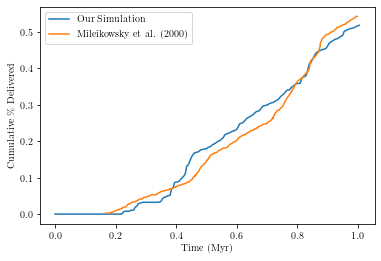

In [2]:
data = load_data(1000, 99, path = "../output/")
cume_probs = cume_prob(data)
mars_to_earth = np.genfromtxt('../data/mars_to_earth.csv',delimiter=',',
                              skip_header=1)

t = np.arange(cume_probs.shape[0]) *5000
plt.plot(t/1e6, cume_probs*100, label="Our Simulation")
plt.plot(mars_to_earth[:,0][mars_to_earth[:,0] < 1], 
         mars_to_earth[:,1][mars_to_earth[:,0]<1]*100, 
         label="Mileikowsky et al. (2000)")
plt.legend()
plt.ylabel("Cumulative \% Delivered")
plt.xlabel("Time (Myr)")
plt.savefig("../figures/mileikowsky_comp.eps")
plt.show()

In [3]:
print(f"Mileikowski: {np.max(mars_to_earth[:,1][mars_to_earth[:,0]<1]*100)}")
print(f"Our Model: {np.max(cume_probs*100)}")

diff = ((np.max(cume_probs*100) - 
        np.max(mars_to_earth[:,1][mars_to_earth[:,0]<1]*100)) / 
np.max(mars_to_earth[:,1][mars_to_earth[:,0]<1]*100))

print(f"Percentage Difference: {diff*100}%")

Mileikowski: 0.5424186105030999
Our Model: 0.5179983982103509
Percentage Difference: -4.502097055648403%
